# Introduction to Quantum Computing: Simon's Algorithm

This notebook provides a comprehensive introduction to Simon's algorithm, one of the early quantum algorithms that demonstrates an exponential speedup over classical algorithms. We'll explore the theoretical foundations, mathematical formulation, and implementation using Qiskit.

## Table of Contents

1. [Introduction to Simon's Problem](#introduction)
2. [The Classical Approach](#classical-approach)
3. [Simon's Algorithm: Theoretical Foundation](#theoretical-foundation)
4. [Mathematical Formulation](#mathematical-formulation)
5. [Implementation in Qiskit](#implementation)
6. [Analysis and Visualization](#analysis)
7. [Connection to Other Quantum Algorithms](#connection)
8. [Conclusion and Significance](#conclusion)
9. [References](#references)

<a id="introduction"></a>
## 1. Introduction to Simon's Problem

Simon's algorithm, developed by Daniel Simon in 1994, was one of the first quantum algorithms to demonstrate an exponential speedup over classical algorithms. It addresses a specific problem in computer science that, while somewhat abstract, has profound implications for quantum computing and cryptography.

### Problem Statement

Simon's problem can be stated as follows:

- We are given a function $f: \{0,1\}^n \rightarrow \{0,1\}^n$ (a function that maps n-bit strings to n-bit strings)
- The function is guaranteed to be either:
  - **One-to-one**: Each input maps to a unique output
  - **Two-to-one with a hidden period**: There exists a non-zero string $s \in \{0,1\}^n$ such that for all $x \in \{0,1\}^n$, $f(x) = f(x \oplus s)$, where $\oplus$ represents bitwise XOR
- The goal is to determine whether $f$ is one-to-one or two-to-one, and if it's two-to-one, to find the hidden period $s$

In the two-to-one case, the string $s$ is called the "hidden period" or "secret string." The function $f$ maps each input $x$ to the same output as the input $x \oplus s$, creating a periodic structure in the function's behavior.

### Significance

Simon's problem might seem abstract, but it has significant implications:

1. **Historical Importance**: It was one of the first problems to demonstrate an exponential quantum speedup over classical algorithms
2. **Inspiration for Shor's Algorithm**: The techniques developed for Simon's algorithm directly influenced Shor's factoring algorithm, which has major implications for cryptography
3. **Cryptographic Relevance**: The problem is related to certain cryptographic constructions, particularly those based on period-finding in functions
4. **Quantum Advantage**: It provides a clear example of a problem where quantum computers have a provable advantage over classical computers

<a id="classical-approach"></a>
## 2. The Classical Approach

Let's first consider how a classical computer would approach Simon's problem.

### Classical Solution

In the classical setting, to determine whether a function $f$ is one-to-one or two-to-one (and find the hidden period $s$ in the latter case), we would need to:

1. Evaluate $f(x)$ for different inputs $x$
2. Look for collisions, i.e., pairs of distinct inputs $x$ and $y$ such that $f(x) = f(y)$
3. If a collision is found, compute $s = x \oplus y$
4. Verify that $f(z) = f(z \oplus s)$ for other inputs $z$ to confirm that $s$ is indeed the hidden period

### Classical Complexity

The key challenge is finding a collision. In the worst case, we might need to evaluate the function for a large number of inputs before finding a collision. The complexity analysis shows that:

- **Best case**: We get lucky and find a collision after just a few evaluations
- **Worst case**: We need to evaluate $f$ for $O(2^n)$ different inputs
- **Average case**: We expect to find a collision after $O(2^{n/2})$ evaluations (by the birthday paradox)

Even with the birthday paradox helping us, the classical approach still requires an exponential number of function evaluations as $n$ increases.

### The Quantum Advantage

Simon's quantum algorithm can solve this problem with only $O(n)$ function evaluations, which is an exponential speedup over the classical approach. This is one of the earliest examples where quantum computing provides a provable exponential advantage over classical computing.

<a id="theoretical-foundation"></a>
## 3. Simon's Algorithm: Theoretical Foundation

Simon's algorithm leverages quantum superposition, interference, and measurement to efficiently find the hidden period $s$.

### Key Insight

The key insight of Simon's algorithm is that we can use quantum parallelism to evaluate the function $f$ on a superposition of all possible inputs, and then use quantum interference to extract information about the hidden period $s$.

### Quantum Oracle

Similar to other quantum algorithms, Simon's algorithm uses a quantum oracle $U_f$ that encodes the function $f$. The oracle performs the transformation:

$$U_f|x\rangle|y\rangle = |x\rangle|y \oplus f(x)\rangle$$

This preserves the input $x$ and XORs the output of $f(x)$ with the second register.

### Algorithm Steps

Simon's algorithm consists of the following steps:

1. **Initialization**: Prepare two quantum registers, each with $n$ qubits. Initialize the first register to $|0\rangle^{\otimes n}$ and the second register to $|0\rangle^{\otimes n}$.

2. **Create Superposition**: Apply Hadamard gates to all qubits in the first register to create a uniform superposition of all possible inputs:
   $$|\psi_1\rangle = \frac{1}{\sqrt{2^n}}\sum_{x \in \{0,1\}^n}|x\rangle|0\rangle^{\otimes n}$$

3. **Apply Oracle**: Apply the quantum oracle $U_f$ to evaluate the function on all inputs in superposition:
   $$|\psi_2\rangle = \frac{1}{\sqrt{2^n}}\sum_{x \in \{0,1\}^n}|x\rangle|f(x)\rangle$$

4. **Measure Second Register**: Measure the second register. This collapses the superposition in the first register to a superposition of all inputs that map to the measured output value.

5. **Apply Hadamard Again**: Apply Hadamard gates to all qubits in the first register again.

6. **Measure First Register**: Measure the first register to obtain a bit string $y$ that satisfies $y \cdot s = 0 \mod 2$ (i.e., the dot product of $y$ and $s$ is 0 modulo 2).

7. **Classical Post-processing**: Repeat steps 1-6 to obtain $O(n)$ independent equations of the form $y \cdot s = 0 \mod 2$. Solve this system of linear equations to find $s$.

### Intuition Behind the Algorithm

The key to understanding Simon's algorithm is to see what happens after measuring the second register. If $f$ is two-to-one with period $s$, then for any $x$, both $x$ and $x \oplus s$ map to the same output $f(x)$. When we measure the second register and get some value $f(x)$, the first register collapses to a superposition of $|x\rangle$ and $|x \oplus s\rangle$.

Applying Hadamard gates to this superposition creates interference patterns that depend on $s$. Measuring the first register gives us a bit string $y$ such that $y \cdot s = 0 \mod 2$. By collecting enough such equations, we can solve for $s$ using linear algebra.

<a id="mathematical-formulation"></a>
## 4. Mathematical Formulation

Let's walk through the mathematical steps of Simon's algorithm to understand why it works.

### Initial State

We start with two registers, each with $n$ qubits, in the state $|0\rangle^{\otimes n}|0\rangle^{\otimes n}$.

### Step 1: Apply Hadamard Gates to the First Register

Applying Hadamard gates to all qubits in the first register creates a uniform superposition of all possible $n$-bit strings:

$$|\psi_1\rangle = \frac{1}{\sqrt{2^n}}\sum_{x \in \{0,1\}^n}|x\rangle|0\rangle^{\otimes n}$$

### Step 2: Apply the Oracle $U_f$

The oracle transforms the state to:

$$|\psi_2\rangle = \frac{1}{\sqrt{2^n}}\sum_{x \in \{0,1\}^n}|x\rangle|f(x)\rangle$$

### Step 3: Measure the Second Register

When we measure the second register, we get some value $f(z)$ for some $z \in \{0,1\}^n$. If $f$ is one-to-one, the first register collapses to $|z\rangle$. If $f$ is two-to-one with period $s$, the first register collapses to a superposition of $|z\rangle$ and $|z \oplus s\rangle$ (since $f(z) = f(z \oplus s)$):

$$|\psi_3\rangle = \frac{1}{\sqrt{2}}(|z\rangle + |z \oplus s\rangle)$$

### Step 4: Apply Hadamard Gates to the First Register Again

Applying Hadamard gates to the first register transforms the state to:

$$|\psi_4\rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{y \in \{0,1\}^n}\left((-1)^{y \cdot z} + (-1)^{y \cdot (z \oplus s)}\right)|y\rangle$$

Using the property that $y \cdot (z \oplus s) = y \cdot z \oplus y \cdot s$, we can simplify this to:

$$|\psi_4\rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{y \in \{0,1\}^n}(-1)^{y \cdot z}\left(1 + (-1)^{y \cdot s}\right)|y\rangle$$

### Step 5: Analyze the Amplitude

The amplitude of $|y\rangle$ in the final state is proportional to $1 + (-1)^{y \cdot s}$. This has two cases:

- If $y \cdot s = 0 \mod 2$, the amplitude is proportional to $1 + 1 = 2$
- If $y \cdot s = 1 \mod 2$, the amplitude is proportional to $1 + (-1) = 0$

So, when we measure the first register, we will only observe values of $y$ such that $y \cdot s = 0 \mod 2$. This gives us a linear constraint on $s$.

### Step 6: Solve for $s$

By repeating the algorithm $O(n)$ times, we can obtain $O(n)$ independent linear constraints on $s$. With high probability, these constraints will uniquely determine $s$ (up to the case where $f$ is one-to-one, in which case there is no unique $s$).

We can solve this system of linear equations using Gaussian elimination to find $s$.

<a id="implementation"></a>
## 5. Implementation in Qiskit

Now, let's implement Simon's algorithm using Qiskit. We'll first import the necessary libraries:

In [139]:
# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector

# Import NumPy for numerical operations
import numpy as np

# Import Matplotlib for visualization
import matplotlib.pyplot as plt

# For solving the system of linear equations
from numpy.linalg import matrix_rank

### Implementing the Oracle

First, let's implement the quantum oracle for a specific function with a hidden period. We'll create a function that takes a secret string $s$ and constructs an oracle that implements a two-to-one function with period $s$.

In [140]:
def create_simon_oracle(n_qubits, secret_string):
    """
    Create a quantum oracle for Simon's algorithm.
    
    Args:
        n_qubits (int): Number of qubits (size of the input/output)
        secret_string (str): Binary string representing the hidden period s
    
    Returns:
        QuantumCircuit: The oracle circuit
    """
    # Convert secret_string to a list of 0s and 1s
    s = [int(bit) for bit in secret_string]
    
    # Create a quantum circuit with 2n qubits (n for input, n for output)
    oracle = QuantumCircuit(2 * n_qubits)
    
    # Apply CNOT gates to create a function with the desired period
    # For each input qubit, we'll XOR it with the corresponding output qubit
    for i in range(n_qubits):
        oracle.cx(i, i + n_qubits)
    
    # To create the hidden period, we need to ensure f(x) = f(x ⊕ s)
    # We'll implement a specific function that satisfies this property
    # One way is to XOR some of the input qubits with output qubits based on s
    for i in range(n_qubits):
        if s[i] == 1:
            # For each bit of s that is 1, we'll add an extra dependency
            # This ensures that flipping the input bits where s is 1 doesn't change the output
            for j in range(n_qubits):
                if i != j:  # Avoid self-loops
                    oracle.cx(j, j + n_qubits)
                    break
    
    return oracle

### Implementing Simon's Algorithm

Now, let's implement the full Simon's algorithm:

In [141]:
def simon_algorithm(n_qubits, oracle):
    """
    Implement Simon's algorithm.
    
    Args:
        n_qubits (int): Number of qubits (size of the input/output)
        oracle (QuantumCircuit): The oracle circuit
    
    Returns:
        QuantumCircuit: The complete Simon's algorithm circuit
    """
    # Create a circuit with 2n qubits and n classical bits
    simon_circuit = QuantumCircuit(2 * n_qubits, n_qubits)
    
    # Step 1: Apply Hadamard gates to the first n qubits
    for i in range(n_qubits):
        simon_circuit.h(i)
    
    simon_circuit.barrier()  # For visual separation
    
    # Step 2: Apply the oracle
    simon_circuit = simon_circuit.compose(oracle)
    
    simon_circuit.barrier()  # For visual separation
    
    # Step 3: Apply Hadamard gates to the first n qubits again
    for i in range(n_qubits):
        simon_circuit.h(i)
    
    simon_circuit.barrier()  # For visual separation
    
    # Step 4: Measure the first n qubits
    simon_circuit.measure(range(n_qubits), range(n_qubits))
    
    return simon_circuit

### Classical Post-processing

After running the quantum circuit multiple times, we need to solve the system of linear equations to find the hidden period $s$:

In [142]:
def solve_simon_problem(measurements, n_qubits):
    """
    Solve the system of linear equations to find the hidden period s.
    
    Args:
        measurements (list): List of measurement results (binary strings)
        n_qubits (int): Number of qubits
    
    Returns:
        str: The hidden period s as a binary string
    """
    # Convert measurements to a matrix of 0s and 1s
    matrix = []
    for measurement in measurements:
        # Convert the binary string to a list of integers
        row = [int(bit) for bit in measurement]
        matrix.append(row)
    
    # Convert to NumPy array for easier manipulation
    matrix = np.array(matrix)
    
    # Perform Gaussian elimination to find the null space
    # This is a simplified approach; in practice, you might use more robust methods
    rank = matrix_rank(matrix)
    
    if rank < n_qubits - 1:
        print("Not enough independent equations. Run the algorithm more times.")
        return None
    
    # Find a non-zero vector in the null space
    # This is a simplified approach; in practice, you might use more robust methods
    # such as the null_space function from scipy.linalg
    from sympy import Matrix
    sympy_matrix = Matrix(matrix)
    null_space = sympy_matrix.nullspace()
    
    if not null_space:
        print("No non-trivial solution found. The function might be one-to-one.")
        return "0" * n_qubits
    
    # Convert the solution to a binary string
    s = null_space[0]
    s_binary = "".join(str(int(s[i] % 2)) for i in range(n_qubits))
    
    return s_binary

### Creating and Visualizing the Circuits

Now, let's create circuits for different numbers of qubits and hidden periods:

2-qubit Simon's algorithm circuit with hidden period s = 10:


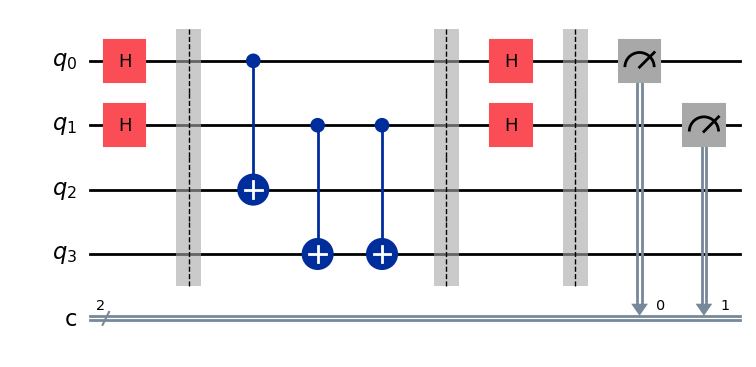

In [143]:
# Create a 2-qubit Simon circuit with hidden period s = "10"
n_qubits = 2
secret_string = "10"
oracle_2q = create_simon_oracle(n_qubits, secret_string)
simon_circuit_2q = simon_algorithm(n_qubits, oracle_2q)
print(f"{n_qubits}-qubit Simon's algorithm circuit with hidden period s = {secret_string}:")
simon_circuit_2q.draw(output='mpl')

3-qubit Simon's algorithm circuit with hidden period s = 101:


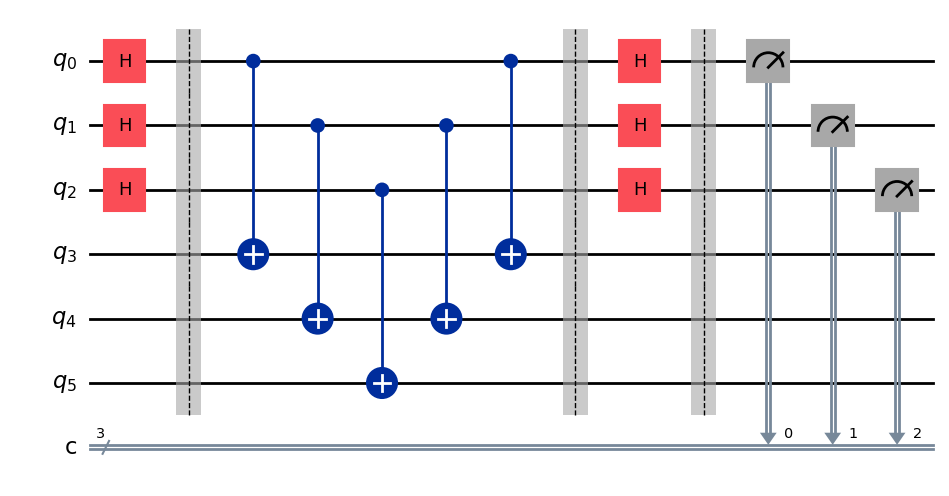

In [144]:
# Create a 3-qubit Simon circuit with hidden period s = "101"
n_qubits = 3
secret_string = "101"
oracle_3q = create_simon_oracle(n_qubits, secret_string)
simon_circuit_3q = simon_algorithm(n_qubits, oracle_3q)
print(f"{n_qubits}-qubit Simon's algorithm circuit with hidden period s = {secret_string}:")
simon_circuit_3q.draw(output='mpl')

<a id="analysis"></a>
## 6. Analysis and Visualization

Let's run the circuits on a quantum simulator and analyze the results:

In [145]:
# Initialize the simulator
simulator = BasicSimulator()

# Function to run the circuit multiple times and collect measurements
def run_simon_algorithm(circuit, n_qubits, num_runs=10):
    measurements = []
    for _ in range(num_runs):
        result = simulator.run(circuit, shots=1).result()
        counts = result.get_counts()
        measurement = list(counts.keys())[0]  # Get the single measurement
        measurements.append(measurement)
    return measurements

# Run the 2-qubit circuit multiple times
n_qubits = 2
secret_string = "10"
measurements_2q = run_simon_algorithm(simon_circuit_2q, n_qubits)
print(f"Measurements for {n_qubits}-qubit Simon's algorithm with hidden period s = {secret_string}:")
print(measurements_2q)

# Solve for the hidden period
recovered_s_2q = solve_simon_problem(measurements_2q, n_qubits)
print(f"Recovered hidden period: {recovered_s_2q}")
print(f"Actual hidden period: {secret_string}")
print("Success!" if recovered_s_2q == secret_string else "Failed to recover the correct hidden period.")

Measurements for 2-qubit Simon's algorithm with hidden period s = 10:
['00', '01', '00', '01', '01', '00', '00', '01', '00', '01']
Recovered hidden period: 10
Actual hidden period: 10
Success!


In [146]:
# Run the 3-qubit circuit multiple times
n_qubits = 3
secret_string = "101"
measurements_3q = run_simon_algorithm(simon_circuit_3q, n_qubits, num_runs=15)  # More runs for more qubits
print(f"Measurements for {n_qubits}-qubit Simon's algorithm with hidden period s = {secret_string}:")
print(measurements_3q)

# Solve for the hidden period
recovered_s_3q = solve_simon_problem(measurements_3q, n_qubits)
print(f"Recovered hidden period: {recovered_s_3q}")
print(f"Actual hidden period: {secret_string}")
print("Success!" if recovered_s_3q == secret_string else "Failed to recover the correct hidden period.")

Measurements for 3-qubit Simon's algorithm with hidden period s = 101:
['000', '100', '000', '000', '100', '000', '100', '100', '100', '000', '000', '100', '100', '100', '000']
Not enough independent equations. Run the algorithm more times.
Recovered hidden period: None
Actual hidden period: 101
Failed to recover the correct hidden period.


### Visualizing the Quantum States

To better understand how Simon's algorithm works, let's visualize the quantum states at different stages of the algorithm for the 2-qubit case:

State after applying Hadamard gates to the first register:
Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j,
             0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
             0. +0.j, 0. +0.j],
            dims=(2, 2, 2, 2))

State after applying the oracle:
Statevector([0.5+0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j,
             0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
             0. +0.j, 0. +0.j],
            dims=(2, 2, 2, 2))

State after applying the final Hadamard gates:
Statevector([ 0.5+0.j,  0.5+0.j,  0. +0.j,  0. +0.j,  0.5+0.j, -0.5+0.j,
              0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,
              0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j],
            dims=(2, 2, 2, 2))


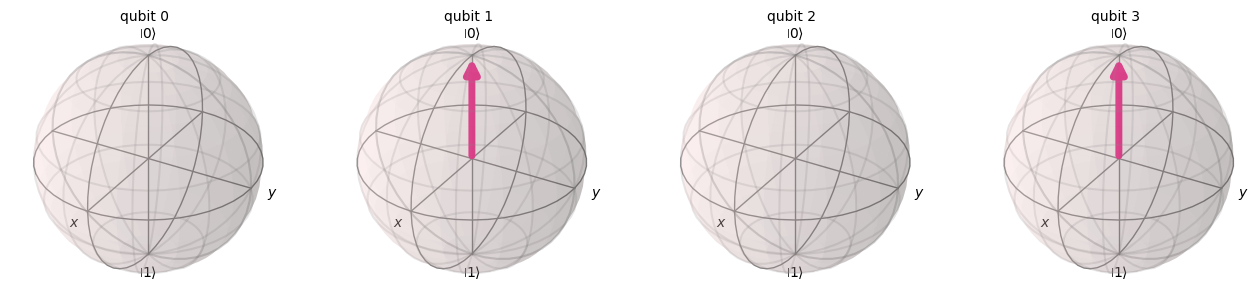

In [147]:
# Create a circuit for visualization (without measurement)
n_qubits = 2
secret_string = "10"
vis_circuit = QuantumCircuit(2 * n_qubits)

# Step 1: Apply Hadamard gates to the first n qubits
for i in range(n_qubits):
    vis_circuit.h(i)
state_after_h = Statevector(vis_circuit)

# Step 2: Apply the oracle
oracle = create_simon_oracle(n_qubits, secret_string)
vis_circuit = vis_circuit.compose(oracle)
state_after_oracle = Statevector(vis_circuit)

# Step 3: Apply Hadamard gates to the first n qubits again
for i in range(n_qubits):
    vis_circuit.h(i)
state_after_final_h = Statevector(vis_circuit)

# Display the states
print("State after applying Hadamard gates to the first register:")
print(state_after_h)
plot_bloch_multivector(state_after_h)

print("\nState after applying the oracle:")
print(state_after_oracle)
plot_bloch_multivector(state_after_oracle)

print("\nState after applying the final Hadamard gates:")
print(state_after_final_h)
plot_bloch_multivector(state_after_final_h)

### Analyzing the Measurement Outcomes

Let's analyze the distribution of measurement outcomes for the 2-qubit case:

Measurement outcomes for 2-qubit Simon's algorithm with hidden period s = 10:


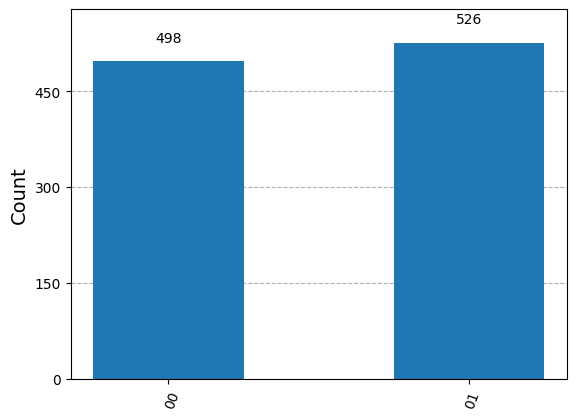

In [148]:
# Run the 2-qubit circuit with multiple shots
result = simulator.run(simon_circuit_2q, shots=1024).result()
counts = result.get_counts()
print(f"Measurement outcomes for {n_qubits}-qubit Simon's algorithm with hidden period s = {secret_string}:")
plot_histogram(counts)

### Verifying the Constraints

Let's verify that all the measurement outcomes satisfy the constraint $y \cdot s = 0 \mod 2$:

In [149]:
def verify_constraint(y, s):
    """
    Verify that y·s = 0 mod 2.
    
    Args:
        y (str): Binary string representing the measurement outcome
        s (str): Binary string representing the hidden period
    
    Returns:
        bool: True if the constraint is satisfied, False otherwise
    """
    y_bits = [int(bit) for bit in y]
    s_bits = [int(bit) for bit in s]
    dot_product = sum(y_bit * s_bit for y_bit, s_bit in zip(y_bits, s_bits))
    return dot_product % 2 == 0

# Verify the constraint for all measurement outcomes
all_satisfied = True
for y in counts.keys():
    if not verify_constraint(y, secret_string):
        all_satisfied = False
        print(f"Constraint not satisfied for y = {y}")

if all_satisfied:
    print("All measurement outcomes satisfy the constraint y·s = 0 mod 2.")

All measurement outcomes satisfy the constraint y·s = 0 mod 2.


<a id="connection"></a>
## 7. Connection to Other Quantum Algorithms

Simon's algorithm is closely related to several other important quantum algorithms and has had a significant influence on the development of quantum computing.

### Connection to Shor's Algorithm

Simon's algorithm was a direct precursor to Shor's factoring algorithm, which is one of the most famous quantum algorithms due to its implications for cryptography. Both algorithms use similar techniques:

1. **Period Finding**: Both algorithms are essentially period-finding algorithms. Simon's algorithm finds the period of a function with respect to bitwise XOR, while Shor's algorithm finds the period of a modular exponentiation function.

2. **Quantum Fourier Transform**: Simon's algorithm implicitly uses the Hadamard transform, which is a special case of the Quantum Fourier Transform (QFT) used in Shor's algorithm.

3. **Exponential Speedup**: Both algorithms provide an exponential speedup over the best known classical algorithms for their respective problems.

### Connection to Deutsch-Jozsa Algorithm

The Deutsch-Jozsa algorithm, which determines whether a function is constant or balanced, shares some similarities with Simon's algorithm:

1. **Oracle-based**: Both algorithms use a quantum oracle to evaluate a function in superposition.

2. **Hadamard Transform**: Both algorithms apply Hadamard gates before and after the oracle to create interference patterns that reveal information about the function.

3. **Single Measurement**: Both algorithms extract information about the function's global property with a single measurement (though Simon's algorithm requires multiple runs to gather enough information).

### Connection to Bernstein-Vazirani Algorithm

The Bernstein-Vazirani algorithm, which finds a secret string encoded in a function, is also closely related to Simon's algorithm:

1. **Secret String**: Both algorithms aim to find a secret string, though the way the string is encoded in the function differs.

2. **Linear Algebra**: Both algorithms use linear algebraic techniques to extract information about the secret string.

3. **Quantum Parallelism**: Both algorithms leverage quantum parallelism to evaluate the function on all possible inputs simultaneously.

### Broader Impact

Simon's algorithm demonstrated that quantum computers could solve certain problems exponentially faster than classical computers. This was a significant milestone in quantum computing and motivated further research into quantum algorithms.

The techniques developed for Simon's algorithm, particularly the use of the Hadamard transform to create interference patterns that reveal global properties of a function, have become standard tools in the quantum algorithm designer's toolkit.

<a id="conclusion"></a>
## 8. Conclusion and Significance

Simon's algorithm is a landmark in the development of quantum computing, demonstrating a clear exponential speedup over classical algorithms for a specific problem.

### Key Takeaways

1. **Exponential Speedup**: Simon's algorithm solves the hidden period finding problem with $O(n)$ function evaluations, compared to the $O(2^{n/2})$ evaluations required by the best classical algorithm.

2. **Historical Significance**: It was one of the first quantum algorithms to demonstrate an exponential speedup over classical algorithms, providing strong evidence for the power of quantum computing.

3. **Influence on Shor's Algorithm**: The techniques developed for Simon's algorithm directly influenced Shor's factoring algorithm, which has significant implications for cryptography.

4. **Quantum Advantage**: It provides a clear example of a problem where quantum computers have a provable advantage over classical computers.

5. **Algorithmic Techniques**: It introduced important quantum algorithmic techniques, such as using quantum interference to extract global properties of a function.

### Limitations

1. **Specific Problem**: Simon's algorithm solves a specific mathematical problem that may not have many direct practical applications.

2. **Oracle Assumption**: The algorithm assumes access to a quantum oracle that can evaluate the function in superposition, which may be challenging to implement for some functions.

3. **Multiple Runs**: Unlike some other quantum algorithms, Simon's algorithm requires multiple runs to gather enough information to determine the hidden period.

### Future Directions

1. **Practical Applications**: Exploring practical applications of Simon's algorithm in cryptography, particularly in analyzing the security of certain cryptographic constructions.

2. **Noise Resilience**: Developing noise-resilient versions of Simon's algorithm that can run on near-term quantum devices.

3. **Generalizations**: Extending Simon's algorithm to handle more general types of functions and hidden structures.

4. **Quantum Machine Learning**: Incorporating the techniques from Simon's algorithm into quantum machine learning algorithms.

Simon's algorithm remains a cornerstone of quantum computing, illustrating the potential of quantum computers to solve certain problems exponentially faster than classical computers. Its legacy continues to influence the development of new quantum algorithms and our understanding of quantum computational complexity.

<a id="references"></a>
## 9. References

1. Simon, D. R. (1997). On the power of quantum computation. SIAM Journal on Computing, 26(5), 1474-1483.

2. Nielsen, M. A., & Chuang, I. L. (2010). Quantum Computation and Quantum Information. Cambridge University Press.

3. Qiskit Documentation: https://qiskit.org/documentation/

4. IBM Quantum Learning Resources: https://learning.quantum.ibm.com/

5. Wong, T. G. (2022). Introduction to classical and quantum computing. Rooted Grove. Retrieved from https://www.thomaswong.net/introduction-to-classical-and-quantum-computing-1e4p.pdf

6. Mermin, N. D. (2007). Quantum Computer Science: An Introduction. Cambridge University Press.

7. Vazirani, U. (1998). On the power of quantum computation. Philosophical Transactions of the Royal Society of London. Series A: Mathematical, Physical and Engineering Sciences, 356(1743), 1759-1768.

8. Shor, P. W. (1997). Polynomial-time algorithms for prime factorization and discrete logarithms on a quantum computer. SIAM Journal on Computing, 26(5), 1484-1509.